# Random- und Gridsearch

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.datasets import make_blobs

## Datengrundlage

In [ ]:
class Distribution:
    def __init__(self,n_components=5):
        X, truth = make_blobs(n_samples=500, centers=n_components, cluster_std = [np.random.uniform()*3 for i in range(n_components)],random_state=41)
        self.x = X[:, 0]
        self.y = X[:, 1]
        self.xx, self.yy = np.mgrid[np.min(self.x):np.max(self.x):500j, np.min(self.y):np.max(self.y):500j]
        self.kernel = st.gaussian_kde(np.vstack([self.x, self.y]))
        self.distribution = 1-((np.reshape(self.kernel(np.vstack([self.xx.ravel(), self.yy.ravel()])).T, self.xx.shape)+np.linspace(-0.005,0.002,500).reshape(500,1))**2)
        self.norm_distribution = (self.distribution-np.min(self.distribution))/(np.max(self.distribution)-np.min(self.distribution))

    def predict(self,x,y):
        closest_x = np.argmin(np.absolute(np.linspace(np.min(self.x),np.max(self.x),500)-x))
        closest_y = np.argmin(np.absolute(np.linspace(np.min(self.y),np.max(self.y),500)-y))
        return self.norm_distribution[closest_x,closest_y]


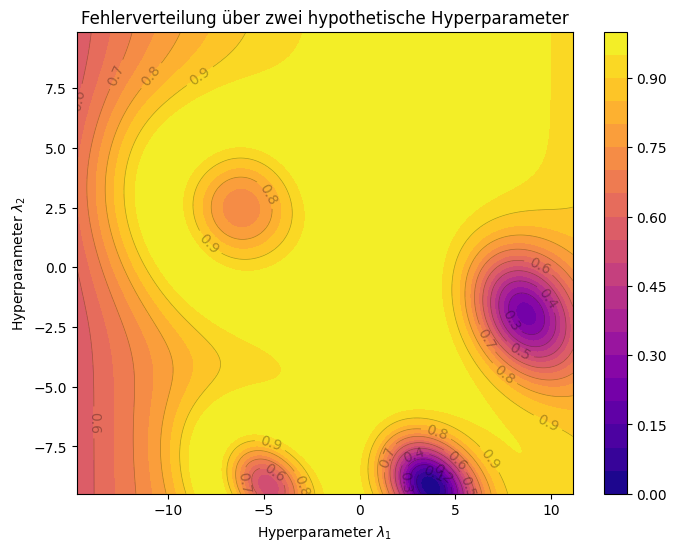

In [3]:
dis = Distribution()
plt.figure(figsize=(8,6))
plt.xlim(np.min(dis.x), np.max(dis.x))
plt.ylim(np.min(dis.y), np.max(dis.y))
cset = plt.contour(dis.xx, dis.yy, dis.norm_distribution,colors="k",levels=10,alpha=0.3,linewidths=0.5)
plt.contourf(dis.xx, dis.yy, dis.norm_distribution,levels=20,cmap="plasma")
plt.colorbar()
plt.clabel(cset, inline=1, fontsize=10)
plt.xlabel('Hyperparameter $\lambda_1$')
plt.ylabel('Hyperparameter $\lambda_2$')
plt.title('Fehlerverteilung über zwei hypothetische Hyperparameter')
plt.show()

## Grid Search

Bester Punkt mit z=0.33 gefunden bei [np.float64(2.4951900191977785), np.float64(-9.480949311187379)]


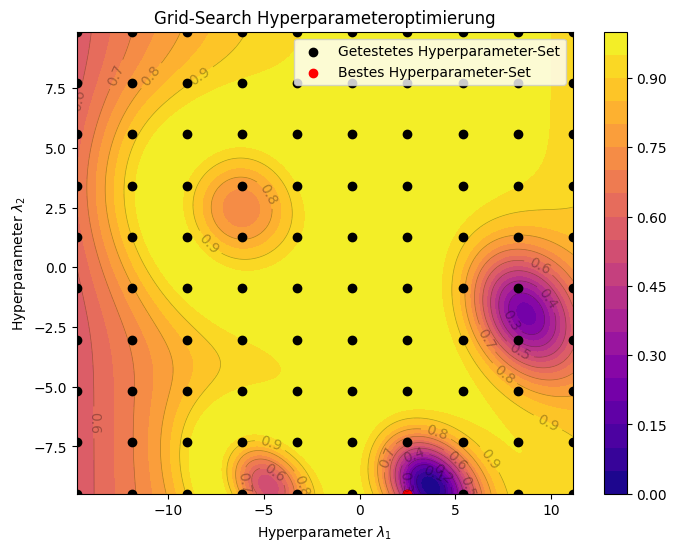

In [ ]:
grid_points_x = np.linspace(np.min(dis.x),np.max(dis.x),10)
grid_points_y = np.linspace(np.min(dis.y),np.max(dis.y),10)
grid_points_mesh = np.meshgrid(grid_points_x,grid_points_y)

min_z = np.inf
best_point = False
for xi in grid_points_x:
    for yi in grid_points_y:
        z = dis.predict(xi,yi)
        if z < min_z:
            min_z = z
            best_point = [xi,yi]

print("Bester Punkt mit z={:.2f} gefunden bei {}".format(min_z, best_point))

plt.figure(figsize=(8,6))
plt.xlim(np.min(dis.x), np.max(dis.x))
plt.ylim(np.min(dis.y), np.max(dis.y))
cset = plt.contour(dis.xx, dis.yy, dis.norm_distribution,colors="k",levels=10,alpha=0.3,linewidths=0.5)
plt.contourf(dis.xx, dis.yy, dis.norm_distribution,levels=20,cmap="plasma")
plt.colorbar()

plt.scatter(grid_points_mesh[0],grid_points_mesh[1],c="black",label="Getestetes Hyperparameter-Set")
plt.scatter(best_point[0], best_point[1], c="red",label="Bestes Hyperparameter-Set")

plt.clabel(cset, inline=1, fontsize=10)
plt.xlabel('Hyperparameter $\lambda_1$')
plt.ylabel('Hyperparameter $\lambda_2$')
plt.title('Grid-Search Hyperparameteroptimierung')
plt.legend(loc='upper right')
plt.show()



## Random-Search

Bester Punkt mit z=0.02 gefunden bei (np.float64(3.4440033369684335), np.float64(-9.279877793951531))


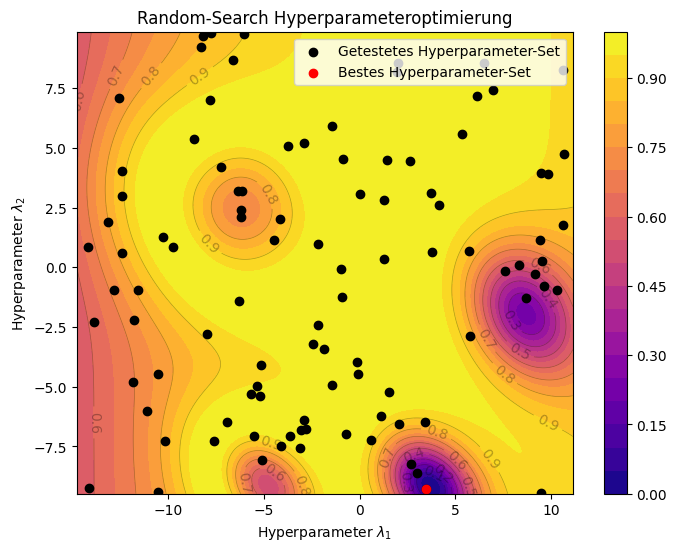

In [ ]:
random_points_x = np.random.uniform(np.min(dis.x),np.max(dis.x),100)
random_points_y = np.random.uniform(np.min(dis.y),np.max(dis.y),100)

min_z = np.inf
best_point = False
for point in zip(random_points_x,random_points_y):
    z = dis.predict(point[0],point[1])
    if z < min_z:
        min_z = z
        best_point = point

print("Bester Punkt mit z={:.2f} gefunden bei {}".format(min_z, best_point))

plt.figure(figsize=(8,6))
plt.xlim(np.min(dis.x), np.max(dis.x))
plt.ylim(np.min(dis.y), np.max(dis.y))
cset = plt.contour(dis.xx, dis.yy, dis.norm_distribution,colors="k",levels=10,alpha=0.3,linewidths=0.5)
plt.contourf(dis.xx, dis.yy, dis.norm_distribution,levels=20,cmap="plasma")
plt.colorbar()

plt.scatter(random_points_x, random_points_y, c="black",label="Getestetes Hyperparameter-Set")
plt.scatter(best_point[0], best_point[1], c="red",label="Bestes Hyperparameter-Set")

plt.clabel(cset, inline=1, fontsize=10)
plt.xlabel('Hyperparameter $\lambda_1$')
plt.ylabel('Hyperparameter $\lambda_2$')
plt.title('Random-Search Hyperparameteroptimierung')
plt.legend(loc='upper right')
plt.show()